LAB TEST 1: Q3

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
col=["class","cap-shape", "cap-surface", "cap-color", "bruises", "odor", "gill-attachment", "gill-spacing", "gill-size", "gill-color", "stalk-shape", "stalk-root", "stalk-surface-above-ring", "stalk-surface-below-ring", "stalk-color-above-ring", "stalk-color-below-ring", "veil-type", "veil-color", "ring-number", "ring-type", "spore-print-color", "population", "habitat"]
mushroom_df = pd.read_csv("/content/agaricus-lepiota.data",header=None, names=col)

In [17]:
print(mushroom_df.head)

<bound method NDFrame.head of      class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0        p         x           s         n       t    p               f   
1        e         x           s         y       t    a               f   
2        e         b           s         w       t    l               f   
3        p         x           y         w       t    p               f   
4        e         x           s         g       f    n               f   
...    ...       ...         ...       ...     ...  ...             ...   
8119     e         k           s         n       f    n               a   
8120     e         x           s         n       f    n               a   
8121     e         f           s         n       f    n               a   
8122     p         k           y         n       f    y               f   
8123     e         x           s         n       f    n               a   

     gill-spacing gill-size gill-color  ... stalk-surface-below-ring 

In [52]:
#encoding
from sklearn.preprocessing import LabelEncoder
mushroom_df.dropna(inplace=True)

le = LabelEncoder()
for col in mushroom_df.columns:
   mushroom_df[col] = le.fit_transform(mushroom_df[col])

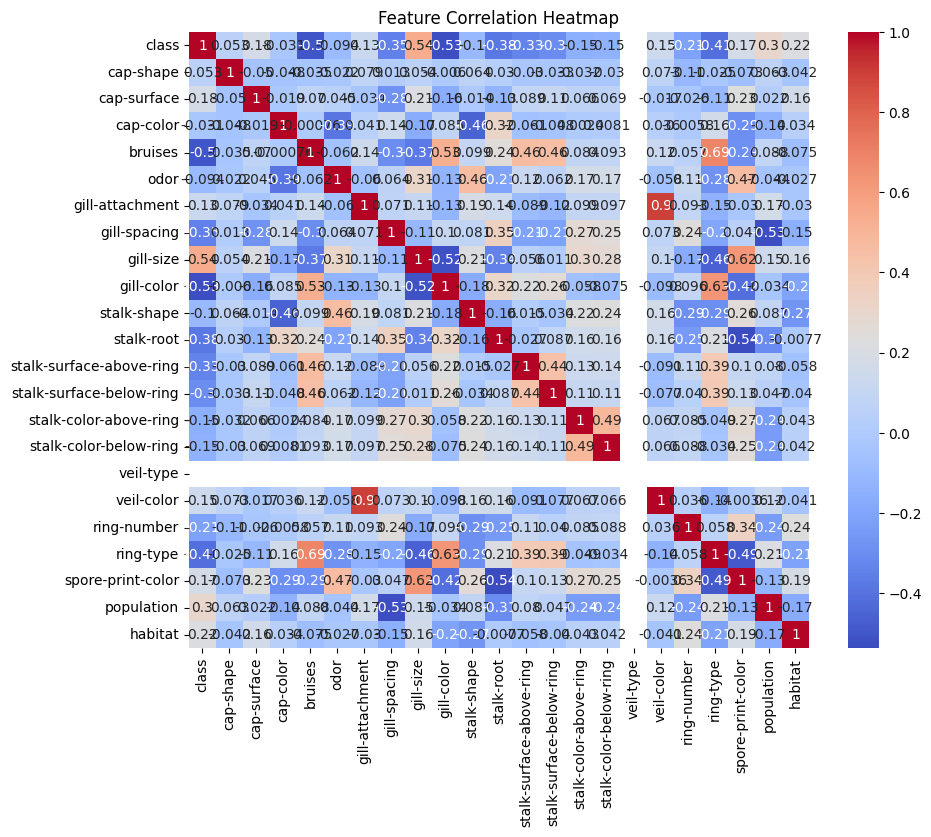

In [53]:
import seaborn as sns

corr_matrix = mushroom_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


In [54]:
#splitting into test and training sets

from sklearn.model_selection import train_test_split

X = mushroom_df.drop('class', axis=1)
y = mushroom_df["class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [55]:
#training the models
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

models = {
    'Logistic Regression': LogisticRegression(),
    'Perceptron': Perceptron(),
    'Multi-Layer Perceptron': MLPClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(),
    'Naive Bayes': GaussianNB()
}


In [56]:
predictions = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions[name] = y_pred


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [57]:
#evaluating model performance

for name, y_pred in predictions.items():
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} accuracy: {accuracy:.2f}")


Logistic Regression accuracy: 0.95
Perceptron accuracy: 0.94
Multi-Layer Perceptron accuracy: 1.00
K-Nearest Neighbors accuracy: 1.00
Support Vector Machine accuracy: 0.99
Naive Bayes accuracy: 0.92


In [58]:
for name, y_pred in predictions.items():
    report = classification_report(y_test, y_pred)
    print(f"{name} classification report:\n{report}\n")


Logistic Regression classification report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       843
           1       0.94      0.95      0.95       782

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625


Perceptron classification report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       843
           1       0.95      0.93      0.94       782

    accuracy                           0.94      1625
   macro avg       0.94      0.94      0.94      1625
weighted avg       0.94      0.94      0.94      1625


Multi-Layer Perceptron classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   

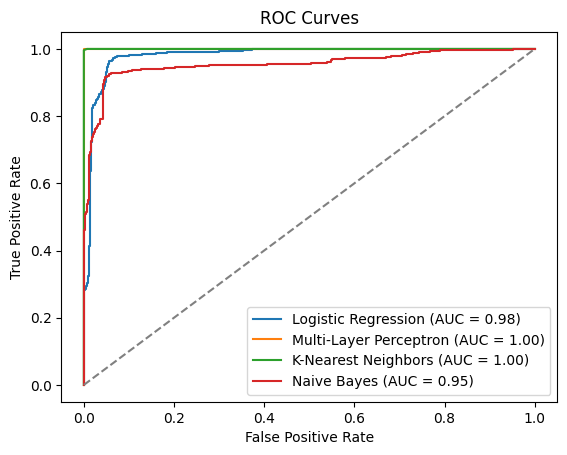

In [59]:
#plt.figure(figsize=(10, 6))
for name, model in models.items():
    if hasattr(model, "predict_proba"):
      y_pred_proba = model.predict_proba(X_test)[:,1]
      fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
      auc = roc_auc_score(y_test, y_pred_proba)
      plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')
    #print(f"ROC curve calculated for {name}.\n")

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()

In [60]:
for name, model in models.items():
    #print(f"Evaluating {name}...")
    # Training set evaluation
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    if hasattr(model, "predict_proba"):
        y_train_pred_proba = model.predict_proba(X_train)[:,1]
        train_auc = roc_auc_score(y_train, y_train_pred_proba)
    else:
        train_auc = None

    # Testing set evaluation
    test_accuracy = accuracy_score(y_test, predictions[name])
    if hasattr(model, "predict_proba"):
        y_test_pred_proba = model.predict_proba(X_test)[:,1]
        test_auc = roc_auc_score(y_test, y_test_pred_proba)
    else:
        test_auc = None

    print(f"Model: {name}")
    print(f"Training Accuracy: {train_accuracy:.2f}")
    print(f"Training AUC: {train_auc:.2f}" if train_auc is not None else "Training AUC: Not applicable")
    print(f"Testing Accuracy: {test_accuracy:.2f}")
    print(f"Testing AUC: {test_auc:.2f}" if test_auc is not None else "Testing AUC: Not applicable")
    print()



Model: Logistic Regression
Training Accuracy: 0.95
Training AUC: 0.98
Testing Accuracy: 0.95
Testing AUC: 0.98

Model: Perceptron
Training Accuracy: 0.94
Training AUC: Not applicable
Testing Accuracy: 0.94
Testing AUC: Not applicable

Model: Multi-Layer Perceptron
Training Accuracy: 1.00
Training AUC: 1.00
Testing Accuracy: 1.00
Testing AUC: 1.00

Model: K-Nearest Neighbors
Training Accuracy: 1.00
Training AUC: 1.00
Testing Accuracy: 1.00
Testing AUC: 1.00

Model: Support Vector Machine
Training Accuracy: 0.99
Training AUC: Not applicable
Testing Accuracy: 0.99
Testing AUC: Not applicable

Model: Naive Bayes
Training Accuracy: 0.92
Training AUC: 0.95
Testing Accuracy: 0.92
Testing AUC: 0.95



Based on evaluation metrics, except for Logestic Regression and Naive Bayes where there's slight indication of overfitting, the other models show good generalization performance without significance evidence of overfitting.

In [61]:
train_accuracy = {}
test_accuracy = {}

for name, model in models.items():
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    train_accuracy[name] = accuracy_score(y_train, train_pred)
    test_accuracy[name] = accuracy_score(y_test, test_pred)

for name in train_accuracy:
    if train_accuracy[name] - test_accuracy[name] > 0.05:
        print(f"{name} is potentially overfitting.")
    else:
        print(f"{name} is not overfitting.")


Logistic Regression is not overfitting.
Perceptron is not overfitting.
Multi-Layer Perceptron is not overfitting.
K-Nearest Neighbors is not overfitting.
Support Vector Machine is not overfitting.
Naive Bayes is not overfitting.


In [64]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Clustering
X_cluster = mushroom_df.drop('class', axis=1)


scaler=StandardScaler()
X_cluster_scaled= scaler.fit_transform(X_cluster)


kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_cluster_scaled)


from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X_cluster_scaled, clusters)
print(f"Silhouette Score: {silhouette_avg}")




/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.1913691603653678


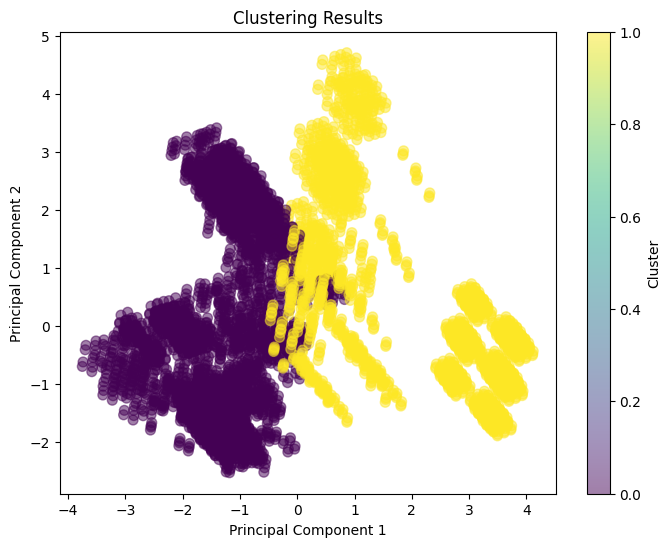

In [65]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_cluster_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', s=50, alpha=0.5)
plt.title('Clustering Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()